In [ ]:
import escape as esc
import numpy as np
import matplotlib.pyplot as plt
from escape.utils.widgets import show
esc.require("0.9.7")

In [ ]:
q = esc.var("Q")


# SAXS. Hollow Cylinder

Author: Denis Korolkov

Original: https://ncnr.nist.gov/resources/sansmodels/HollowCylinder.html

## Description

Calculates the form factor for a monodisperse, hollow, right circular cylinder (or a tube). The inside and outside of the tube have the same scattering length density and the tube itself is of uniform SLD. The form factor is normalized by the tube material volume ONLY such that $P(q) = I_0/V\left<\left|F\right|^2\right> + B$, where F is the scattering amplitude and the $\left< \right>$ denote an average over all possible orientations of the cylinder.

## Parameters


Input | Variables| (default values)
------|----------|-----------------
Parameter|	Variable|	Value
0|	Scale|	1.0
1|	Core Radius (Å)|	20.0
2|	Shell Radius (Å)|	30.0
3|	Length (Å)|	400.0
4|	Contrast ($Å^{-2}$)|	3.0e-6
5|	Incoherent Background ($cm^{-1}$)|	0.0

The function calculated is:

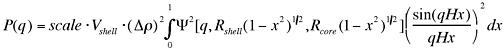
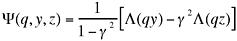




where $J_1$ is the first order Bessel function. The integral over x is the orientaional average and the returned form factor is scaled to units of $cm^{-1}$.

Parameter[0] (scale) and Parameter[4] (contrast) are multiplicative factors in the model and are perfectly correlated. Only one of these parameters should be left free during model fitting.

The user should ensure that the shell radius is always larger than the core radius.

If the scale factor Parameter[0] is set equal to the particle volume fraction, $\phi$, the returned value is the scattered intensity per unit volume, $I(q) = \phi*P(q)$. However, no interparticle interference effects are included in this calculation.

## Reference

Feigin, L. A, and D. I. Svergun, "Structure Analysis by Small-Angle X-Ray and Neutron Scattering", Plenum Press, New York, (1987).



In [ ]:
#we define model parameters as given in the parameters table 
I0 = esc.par("Scale", 1, scale=1e8, fixed=True)
Rc = esc.par("Core Radius", 20, units=esc.angstr)
Rs = esc.par("Shell Radius", 30, units=esc.angstr)
L = esc.par("Length", 400, units=esc.angstr)
rho = esc.par("Contrast", 3, scale=1e-6, units=f"{esc.angstr}⁻²")
bkgr = esc.par("Background", 0.0, userlim=[0, 0.03])

H=L/2
Vs = np.pi*(esc.pow(Rs, 2)-esc.pow(Rc, 2))*L
rat = Rc/Rs

x = esc.var("x")

y = Rs*esc.sqrt(1-x*x)
z = Rc*esc.sqrt(1-x*x)

Gy = 2*esc.cyl_bessel_j(1, q*y)/(q*y)
Gz = 2*esc.cyl_bessel_j(1, q*z)/(q*z)

S = esc.sin(q*H*x)/(q*H*x)

psi = (1/(1-rat*rat))*(Gy-rat*rat*Gz)*S

P5 = I0*Vs*rho*rho*esc.integral(psi*psi, x, 0, 1.0, maxiter=150, epsabs=1e-8, epsrel=1e-8)

show(P5, coordinates=np.linspace(0.001, 1.0, 128), figtitle="Hollow cylinder", 
     xlog=True, ylog=True, xlabel=f"Q[{esc.angstr}⁻¹]", ylabel="P(q)[cm⁻¹]")